In [1]:
# Stanford dataset
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

data = open('web-stanford.txt', 'r')

edge_list = np.empty((2312497, 2),dtype=int)

row = np.empty(2312497,dtype=int)
col = np.empty(2312497,dtype=int)
m_data = np.empty(2312497,dtype=int)

In [2]:

# Reading data and creating edge list
a = True
i = 0
while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] != '#':
        t = data_line.split()
        edge_list[i][0] = int(t[0])
        edge_list[i][1] = int(t[1])
        i = i + 1


eof


In [3]:
# Creating sparse link matrix, binary
for i in range(len(edge_list)):
    col[i] = edge_list[i][0]
    row[i] = edge_list[i][1]
    m_data[i] = 1

In [4]:
Q = csr_matrix((m_data, (row, col)), shape=(281904, 281904)) # Creating sparse matrix from link matrix

In [5]:

# Scaling Q matrix
c_sum=Q.sum(axis=0)
csr_sum=csr_matrix(c_sum, dtype=float)
for x in range(len(csr_sum.data)):
        csr_sum.data[x]=1/csr_sum.data[x]

In [6]:
Q=Q.multiply(csr_sum)

In [7]:
# Vairables for page rank algorithm
epsilon = 10e-5
residual = 1
z = np.ones(Q.shape[1]) / (Q.shape[1])
v = np.ones(Q.shape[1]) / (Q.shape[1])
print(z.shape)
print(z.T.shape)
alpha = 0.85
res = 1
residuals = []

(281904,)
(281904,)


In [8]:
# The page rank algorithm, short and sweet
while res > epsilon:
    yhat = alpha * Q * z
    beta = 1 - np.linalg.norm(yhat, ord=1)
    y = yhat + beta * v
    res = np.linalg.norm(y - z, ord=1)
    residuals.append(res) # For plotting reasons
    z = y

<Figure size 432x288 with 0 Axes>

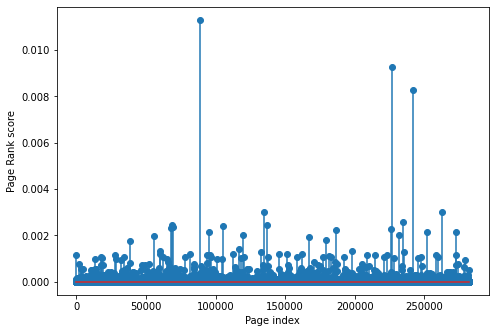

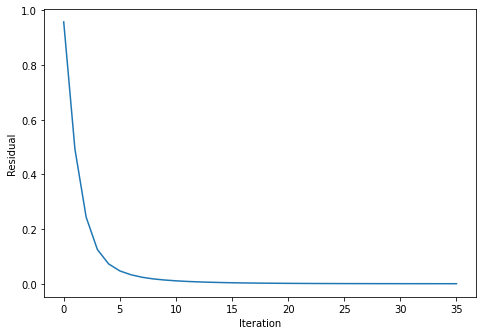

In [9]:
# Plotting page rank scores
import matplotlib.pyplot as plt
plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
y = z
ax.set_ylabel('Page Rank score')
ax.set_xlabel('Page index')
ax.stem(y)
plt.show()

# Plotting development of residual
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
x2 = np.arange(36)
y2 = residuals
ax2.set_ylabel('Residual')
ax2.set_xlabel('Iteration')
ax2.plot(x2,y2)
plt.show()